In [307]:
# importig libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [308]:
# Importing and reading Data
leads = pd.read_csv('Leads.csv')
leads.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


# Data understanding and cleaning

In [309]:
# Size of the file
leads.shape

(9240, 37)

In [310]:
# Analysing data type and null values in each column of the table
leads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [311]:
# Finding percentage of null values in the table for each column
(leads.isnull().sum()/len(leads))*100


Prospect ID                                       0.000000
Lead Number                                       0.000000
Lead Origin                                       0.000000
Lead Source                                       0.389610
Do Not Email                                      0.000000
Do Not Call                                       0.000000
Converted                                         0.000000
TotalVisits                                       1.482684
Total Time Spent on Website                       0.000000
Page Views Per Visit                              1.482684
Last Activity                                     1.114719
Country                                          26.634199
Specialization                                   15.562771
How did you hear about X Education               23.885281
What is your current occupation                  29.112554
What matters most to you in choosing a course    29.318182
Search                                            0.0000

In [312]:
# Dropping and selecting the columns with minimal or no null values
leads_df = leads[['Prospect ID', 'Lead Number', 'Lead Source','Do Not Email', 'Do Not Call', 'Converted', 'TotalVisits','Total Time Spent on Website', 'Page Views Per Visit', 'Specialization', 'How did you hear about X Education','What is your current occupation','What matters most to you in choosing a course', 'Search', 'Magazine','Newspaper Article', 'X Education Forums', 'Newspaper','Digital Advertisement', 'Through Recommendations','Receive More Updates About Our Courses','Update me on Supply Chain Content', 'Get updates on DM Content','I agree to pay the amount through cheque','A free copy of Mastering The Interview', 'Last Notable Activity']]

In [313]:
leads_df.head()

,Prospect ID,Lead Number,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Specialization,...,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Update me on Supply Chain Content,Get updates on DM Content,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,Olark Chat,No,No,0,0.0,0,0.0,Select,...,No,No,No,No,No,No,No,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,Organic Search,No,No,0,5.0,674,2.5,Select,...,No,No,No,No,No,No,No,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Direct Traffic,No,No,1,2.0,1532,2.0,Business Administration,...,No,No,No,No,No,No,No,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Direct Traffic,No,No,0,1.0,305,1.0,Media and Advertising,...,No,No,No,No,No,No,No,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Google,No,No,1,2.0,1428,1.0,Select,...,No,No,No,No,No,No,No,No,No,Modified


In [314]:
# Percentage of null values in new table
(leads_df.isnull().sum()/len(leads_df))*100

Prospect ID                                       0.000000
Lead Number                                       0.000000
Lead Source                                       0.389610
Do Not Email                                      0.000000
Do Not Call                                       0.000000
Converted                                         0.000000
TotalVisits                                       1.482684
Total Time Spent on Website                       0.000000
Page Views Per Visit                              1.482684
Specialization                                   15.562771
How did you hear about X Education               23.885281
What is your current occupation                  29.112554
What matters most to you in choosing a course    29.318182
Search                                            0.000000
Magazine                                          0.000000
Newspaper Article                                 0.000000
X Education Forums                                0.0000

In [315]:
# Shape of new table
leads_df.shape

(9240, 26)

In [316]:
# Count of each value in the table
leads_df['TotalVisits'].value_counts().head()

0.0    2189
2.0    1680
3.0    1306
4.0    1120
5.0     783
Name: TotalVisits, dtype: int64

In [317]:
# imputing the null values in totalvisits and 'Page views per visit' with 0
leads_df['TotalVisits'].fillna(0, inplace = True)
leads_df['Page Views Per Visit'].fillna(0, inplace = True)

C:\Users\Dell\AppData\Local\Temp\ipykernel_5444\1907290994.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  leads_df['TotalVisits'].fillna(0, inplace = True)
C:\Users\Dell\AppData\Local\Temp\ipykernel_5444\1907290994.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  leads_df['Page Views Per Visit'].fillna(0, inplace = True)


In [318]:
leads_df['Specialization'].value_counts()


Select                               1942
Finance Management                    976
Human Resource Management             848
Marketing Management                  838
Operations Management                 503
Business Administration               403
IT Projects Management                366
Supply Chain Management               349
Banking, Investment And Insurance     338
Travel and Tourism                    203
Media and Advertising                 203
International Business                178
Healthcare Management                 159
Hospitality Management                114
E-COMMERCE                            112
Retail Management                     100
Rural and Agribusiness                 73
E-Business                             57
Services Excellence                    40
Name: Specialization, dtype: int64

In [319]:
# Total Null values in 'Specialisation' column
leads_df['Specialization'].isnull().sum()

1438

In [320]:
# 'Select' is itself a null value (1942) and other than that there are 1438 other null values. so dropping specialization column
leads_df.drop('Specialization', axis = 1, inplace = True)

C:\Users\Dell\AppData\Local\Temp\ipykernel_5444\955137622.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  leads_df.drop('Specialization', axis = 1, inplace = True)


In [321]:
leads_df['How did you hear about X Education'].value_counts()

Select                   5043
Online Search             808
Word Of Mouth             348
Student of SomeSchool     310
Other                     186
Multiple Sources          152
Advertisements             70
Social Media               67
Email                      26
SMS                        23
Name: How did you hear about X Education, dtype: int64

In [322]:
#dropping the column 'How did you hear about X Education' due to too much 'Select' values
# 'Select' values are as equivalent as null values
leads_df.drop('How did you hear about X Education', axis =1, inplace = True )

C:\Users\Dell\AppData\Local\Temp\ipykernel_5444\3721811701.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  leads_df.drop('How did you hear about X Education', axis =1, inplace = True )


In [323]:
# We cant impute 2690, it will create bias towards imputed value
leads_df['What is your current occupation'].value_counts()

Unemployed              5600
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: What is your current occupation, dtype: int64

In [324]:
leads_df['What is your current occupation'].isnull().sum()

2690

In [325]:
# NA values are too much so drop column 
leads_df.drop('What is your current occupation', axis = 1, inplace = True)

C:\Users\Dell\AppData\Local\Temp\ipykernel_5444\3814696319.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  leads_df.drop('What is your current occupation', axis = 1, inplace = True)


In [326]:
leads_df['What matters most to you in choosing a course'].value_counts()

Better Career Prospects      6528
Flexibility & Convenience       2
Other                           1
Name: What matters most to you in choosing a course, dtype: int64

In [327]:
# Drop column What matters most to you in choosing a course as nearly everyone has same intent of 'Better Career Prospects' 
# this does not contribute to the analysis
leads_df.drop('What matters most to you in choosing a course', axis =1, inplace = True)

C:\Users\Dell\AppData\Local\Temp\ipykernel_5444\3085366080.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  leads_df.drop('What matters most to you in choosing a course', axis =1, inplace = True)


In [328]:
leads_df.isnull().sum()

Prospect ID                                  0
Lead Number                                  0
Lead Source                                 36
Do Not Email                                 0
Do Not Call                                  0
Converted                                    0
TotalVisits                                  0
Total Time Spent on Website                  0
Page Views Per Visit                         0
Search                                       0
Magazine                                     0
Newspaper Article                            0
X Education Forums                           0
Newspaper                                    0
Digital Advertisement                        0
Through Recommendations                      0
Receive More Updates About Our Courses       0
Update me on Supply Chain Content            0
Get updates on DM Content                    0
I agree to pay the amount through cheque     0
A free copy of Mastering The Interview       0
Last Notable 

In [329]:
# Dropping rows with null values in 'Lead Source'
leads_df = leads_df[leads_df['Lead Source'].isnull()== False]

# Data Preparation

In [330]:
leads_df.shape

(9204, 22)

In [331]:
leads_df.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,9204.000000,9204.000000,9204.000000,9204.000000,9204.000000
mean,617194.608648,0.383746,3.407214,489.005541,2.336674
std,23418.830233,0.486324,4.841571,547.980340,2.163709
min,579533.000000,0.000000,0.000000,0.000000,0.000000
25%,596484.500000,0.000000,1.000000,14.000000,1.000000
50%,615479.000000,0.000000,3.000000,250.000000,2.000000
75%,637409.250000,1.000000,5.000000,938.000000,3.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000


In [332]:
leads_df.head()

,Prospect ID,Lead Number,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Search,...,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Update me on Supply Chain Content,Get updates on DM Content,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,Olark Chat,No,No,0,0.0,0,0.0,No,...,No,No,No,No,No,No,No,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,Organic Search,No,No,0,5.0,674,2.5,No,...,No,No,No,No,No,No,No,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Direct Traffic,No,No,1,2.0,1532,2.0,No,...,No,No,No,No,No,No,No,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Direct Traffic,No,No,0,1.0,305,1.0,No,...,No,No,No,No,No,No,No,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Google,No,No,1,2.0,1428,1.0,No,...,No,No,No,No,No,No,No,No,No,Modified


In [333]:
var_list = ['Do Not Email',
       'Do Not Call', 'Search',
       'Magazine', 'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview']


In [334]:
# Mapping binary varibles in 0 and 1 values to convert it into numerical value

def binary_map(x):
    return x.map({'Yes': 1, "No": 0})

# Applying the function
leads_df[var_list] = leads_df[var_list].apply(binary_map)

In [335]:
leads_df.head()

,Prospect ID,Lead Number,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Search,...,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Update me on Supply Chain Content,Get updates on DM Content,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,Olark Chat,0,0,0,0.0,0,0.0,0,...,0,0,0,0,0,0,0,0,0,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,Organic Search,0,0,0,5.0,674,2.5,0,...,0,0,0,0,0,0,0,0,0,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Direct Traffic,0,0,1,2.0,1532,2.0,0,...,0,0,0,0,0,0,0,0,1,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Direct Traffic,0,0,0,1.0,305,1.0,0,...,0,0,0,0,0,0,0,0,0,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Google,0,0,1,2.0,1428,1.0,0,...,0,0,0,0,0,0,0,0,0,Modified


In [336]:
leads_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9204 entries, 0 to 9239
Data columns (total 22 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Prospect ID                               9204 non-null   object 
 1   Lead Number                               9204 non-null   int64  
 2   Lead Source                               9204 non-null   object 
 3   Do Not Email                              9204 non-null   int64  
 4   Do Not Call                               9204 non-null   int64  
 5   Converted                                 9204 non-null   int64  
 6   TotalVisits                               9204 non-null   float64
 7   Total Time Spent on Website               9204 non-null   int64  
 8   Page Views Per Visit                      9204 non-null   float64
 9   Search                                    9204 non-null   int64  
 10  Magazine                            

In [337]:
# Created dummy variable
dummy1 = pd.get_dummies(leads_df[['Lead Source','Last Notable Activity']], drop_first = True)

In [338]:
leads_df = pd.concat([leads_df,dummy1], axis =1 )

In [339]:
leads_df.shape

(9204, 57)

In [340]:
leads_df.head(3)

,Prospect ID,Lead Number,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Search,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,Olark Chat,0,0,0,0.0,0,0.0,0,...,0,0,1,0,0,0,0,0,0,0
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,Organic Search,0,0,0,5.0,674,2.5,0,...,0,0,0,0,0,0,0,0,0,0
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Direct Traffic,0,0,1,2.0,1532,2.0,0,...,0,0,0,0,0,0,0,0,0,0


In [341]:
leads_df.drop(['Lead Source','Last Notable Activity'], axis =1 , inplace = True)

In [342]:
leads_df.shape

(9204, 55)

# Dealing with outliers 

In [343]:
leads_df.describe(percentiles = [0.25,0.5,0.75,0.80,0.90,0.95, 0.98, 0.99,0.999])

,Lead Number,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Search,Magazine,Newspaper Article,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
count,9204.000000,9204.000000,9204.000000,9204.000000,9204.000000,9204.000000,9204.000000,9204.000000,9204.0,9204.000000,...,9204.000000,9204.000000,9204.000000,9204.000000,9204.000000,9204.000000,9204.000000,9204.000000,9204.000000,9204.000000
mean,617194.608648,0.078336,0.000217,0.383746,3.407214,489.005541,2.336674,0.001521,0.0,0.000217,...,0.000109,0.001521,0.369079,0.019883,0.034550,0.000109,0.233811,0.003477,0.004889,0.000109
std,23418.830233,0.268713,0.014740,0.486324,4.841571,547.980340,2.163709,0.038973,0.0,0.014740,...,0.010423,0.038973,0.482582,0.139605,0.182647,0.010423,0.423277,0.058865,0.069755,0.010423
min,579533.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,596484.500000,0.000000,0.000000,0.000000,1.000000,14.000000,1.000000,0.000000,0.0,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,615479.000000,0.000000,0.000000,0.000000,3.000000,250.000000,2.000000,0.000000,0.0,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,637409.250000,0.000000,0.000000,1.000000,5.000000,938.000000,3.000000,0.000000,0.0,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
80%,641606.600000,0.000000,0.000000,1.000000,5.000000,1090.000000,4.000000,0.000000,0.0,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
90%,650513.100000,0.000000,0.000000,1.000000,7.000000,1380.000000,5.000000,0.000000,0.0,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
95%,655405.850000,1.000000,0.000000,1.000000,10.000000,1562.000000,6.000000,0.000000,0.0,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000


In [344]:
leads_df.shape

(9204, 55)

In [345]:
# dropped top 2% values to remove outliers
leads_df = leads_df[~(leads_df['TotalVisits']>leads_df['TotalVisits'].quantile(.98))]

In [346]:
leads_df = leads_df[~(leads_df['Page Views Per Visit']>leads_df['Page Views Per Visit'].quantile(0.98))]

In [347]:
leads_df.shape

(8851, 55)

In [348]:
leads_df.describe(percentiles = [0.25,0.50,0.75,0.80,0.90,0.95,0.98,0.99,0.999])

,Lead Number,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Search,Magazine,Newspaper Article,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
count,8851.000000,8851.000000,8851.000000,8851.000000,8851.000000,8851.000000,8851.000000,8851.000000,8851.0,8851.0,...,8851.000000,8851.000000,8851.000000,8851.000000,8851.000000,8851.000000,8851.000000,8851.000000,8851.000000,8851.000000
mean,617220.539600,0.076037,0.000226,0.382556,2.928596,480.713027,2.140009,0.001130,0.0,0.0,...,0.000113,0.001469,0.372726,0.020224,0.029262,0.000113,0.234324,0.003389,0.004971,0.000113
std,23401.461522,0.265072,0.015031,0.486039,2.633613,546.056618,1.756999,0.033596,0.0,0.0,...,0.010629,0.038298,0.483557,0.140773,0.168550,0.010629,0.423599,0.058123,0.070335,0.010629
min,579533.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,596513.000000,0.000000,0.000000,0.000000,0.000000,5.000000,0.000000,0.000000,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,615607.000000,0.000000,0.000000,0.000000,3.000000,242.000000,2.000000,0.000000,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,637383.000000,0.000000,0.000000,1.000000,4.000000,921.000000,3.000000,0.000000,0.0,0.0,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
80%,641576.000000,0.000000,0.000000,1.000000,5.000000,1079.000000,4.000000,0.000000,0.0,0.0,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
90%,650488.000000,0.000000,0.000000,1.000000,6.000000,1375.000000,5.000000,0.000000,0.0,0.0,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
95%,655368.500000,1.000000,0.000000,1.000000,8.000000,1557.000000,5.000000,0.000000,0.0,0.0,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000


# Train Test Split

In [349]:
from sklearn.model_selection import train_test_split


In [350]:
leads_df.head()

,Prospect ID,Lead Number,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Search,Magazine,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,0,0,0,0.0,0,0.0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,0,0,0,5.0,674,2.5,0,0,...,0,0,0,0,0,0,0,0,0,0
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,0,0,1,2.0,1532,2.0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,0,0,0,1.0,305,1.0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,3256f628-e534-4826-9d63-4a8b88782852,660681,0,0,1,2.0,1428,1.0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [351]:
x = leads_df.drop(['Prospect ID','Lead Number', 'Converted'], axis =1)

In [352]:
x.head()

,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,0,0,0.0,0,0.0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,0,0,5.0,674,2.5,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,2.0,1532,2.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,1.0,305,1.0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,0,0,2.0,1428,1.0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [353]:
y= leads_df['Converted']

In [354]:
y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [355]:
# Creating train and test sets of x and y
x_train, x_test, y_train, y_test = train_test_split(x,y , train_size = 0.7, test_size = 0.3, random_state = 100)

In [356]:
from sklearn.preprocessing import StandardScaler

In [357]:
scaler = StandardScaler()

In [358]:
# Standardising the values of numerical columns
x_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.fit_transform(x_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])

In [359]:
x_train.head()

,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
3307,0,0,0.405176,1.472339,1.048290,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1062,0,0,1.166379,0.383476,-0.087401,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1179,0,0,0.785778,-0.382761,1.616136,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
5248,0,0,1.166379,-0.157289,2.183982,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
8956,0,0,-0.356027,-0.296605,-0.087401,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


<Axes: >

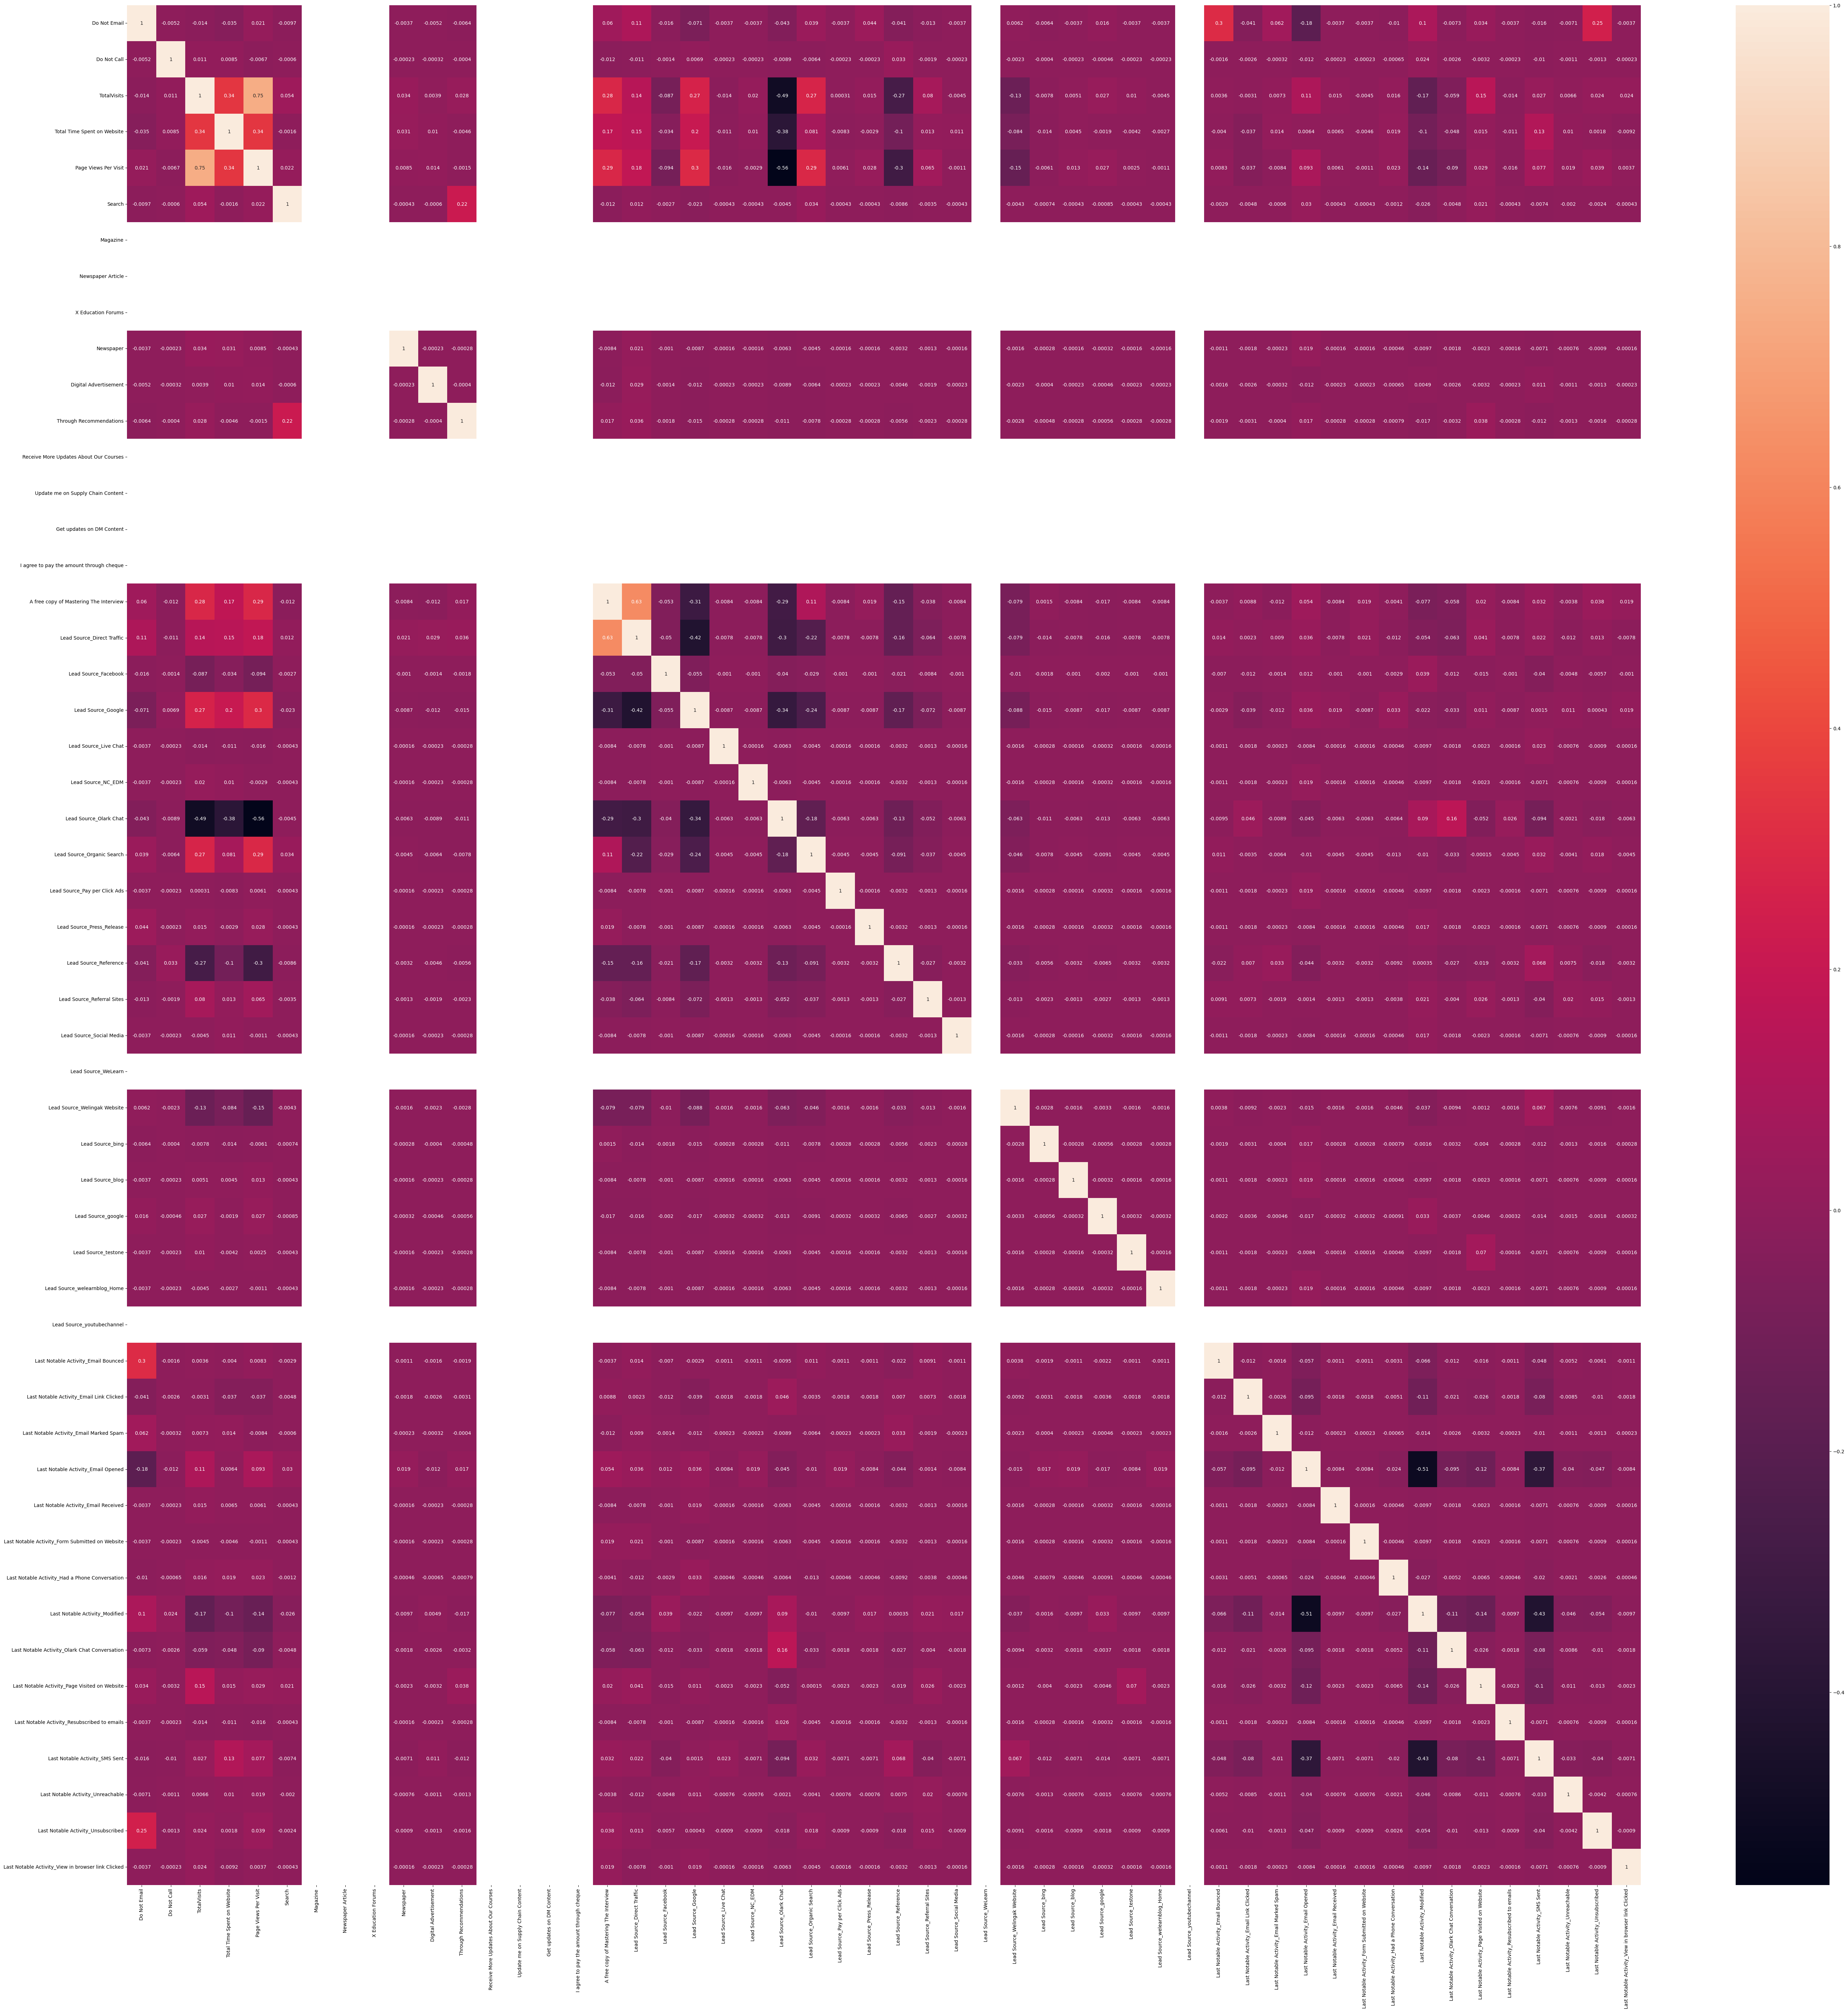

In [360]:
plt.figure(figsize =(70,70))

sns.heatmap(x_train.corr(), annot = True)


## Model Building


### Building First model

In [361]:
import statsmodels.api as sm

In [362]:
# First model

logm1 = sm.GLM(y_train,(sm.add_constant(x_train)), family = sm.families.Binomial())
logm1.fit().summary()

C:\Users\Dell\anaconda3\lib\site-packages\statsmodels\genmod\families\links.py:187: RuntimeWarning: overflow encountered in exp
  t = np.exp(-z)
C:\Users\Dell\anaconda3\lib\site-packages\statsmodels\genmod\families\family.py:1014: RuntimeWarning: divide by zero encountered in log
  special.gammaln(n - y + 1) + y * np.log(mu / (1 - mu + 1e-20)) +
C:\Users\Dell\anaconda3\lib\site-packages\statsmodels\genmod\families\family.py:1014: RuntimeWarning: invalid value encountered in multiply
  special.gammaln(n - y + 1) + y * np.log(mu / (1 - mu + 1e-20)) +


<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6195
Model:                            GLM   Df Residuals:                     6151
Model Family:                Binomial   Df Model:                           43
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                    nan
Date:                Sun, 28 Jan 2024   Deviance:                   1.4764e+05
Time:                        18:33:31   Pearson chi2:                 7.22e+18
No. Iterations:                   100   Pseudo R-squ. (CS):                nan
Covariance Type:            nonrobust                                         
======================================================================================================================
                                                         coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------------------
const                                                  -3e+15   9.49e+07  -3.16e+07      0.000      -3e+15      -3e+15
Do Not Email                                       -5.115e+14    3.6e+06  -1.42e+08      0.000   -5.11e+14   -5.11e+14
Do Not Call                                         1.297e+15   4.75e+07   2.73e+07      0.000     1.3e+15     1.3e+15
TotalVisits                                         1.751e+14   1.38e+06   1.27e+08      0.000    1.75e+14    1.75e+14
Total Time Spent on Website                         2.173e+14   9.62e+05   2.26e+08      0.000    2.17e+14    2.17e+14
Page Views Per Visit                               -9.136e+13   1.49e+06  -6.14e+07      0.000   -9.14e+13   -9.14e+13
Search                                              -5.82e+14   2.61e+07  -2.23e+07      0.000   -5.82e+14   -5.82e+14
Magazine                                              52.3919   4.97e-07   1.05e+08      0.000      52.392      52.392
Newspaper Article                                     42.0128   7.46e-07   5.63e+07      0.000      42.013      42.013
X Education Forums                                   -46.2055   4.81e-07  -9.61e+07      0.000     -46.206     -46.206
Newspaper                                          -2.137e+15   6.73e+07  -3.18e+07      0.000   -2.14e+15   -2.14e+15
Digital Advertisement                              -8.197e+14   4.75e+07  -1.72e+07      0.000    -8.2e+14    -8.2e+14
Through Recommendations                             1.475e+15   3.98e+07   3.71e+07      0.000    1.48e+15    1.48e+15
Receive More Updates About Our Courses                 8.1691   2.82e-07    2.9e+07      0.000       8.169       8.169
Update me on Supply Chain Content                      1.5283    3.7e-07   4.13e+06      0.000       1.528       1.528
Get updates on DM Content                             -5.5588   2.09e-07  -2.66e+07      0.000      -5.559      -5.559
I agree to pay the amount through cheque              -9.3540   2.41e-07  -3.88e+07      0.000      -9.354      -9.354
A free copy of Mastering The Interview              1.009e+14   2.58e+06   3.92e+07      0.000    1.01e+14    1.01e+14
Lead Source_Direct Traffic                           3.19e+15   6.72e+07   4.75e+07      0.000    3.19e+15    3.19e+15
Lead Source_Facebook                                4.116e+15   6.79e+07   6.06e+07      0.000    4.12e+15    4.12e+15
Lead Source_Google                                  3.084e+15   6.72e+07   4.59e+07      0.000    3.08e+15    3.08e+15
Lead Source_Live Chat                               4.842e+15   9.49e+07    5.1e+07      0.000    4.84e+15    4.84e+15
Lead Source_NC_EDM                                  1.447e+16    9.5e+07   1.52e+08      0.000    1.45e+16  

# Eliminating variables using RFE method

In [363]:
from sklearn.linear_model import LogisticRegression

In [364]:
logreg = LogisticRegression(max_iter = 10000)

In [365]:
from sklearn.feature_selection import RFE

In [366]:
rfe = RFE(logreg,n_features_to_select =15)             # running RFE with 15 variables as output
rfe = rfe.fit(x_train, y_train)

In [367]:
rfe.support_

array([ True, False, False,  True, False, False, False, False, False,
       False, False,  True, False, False, False, False, False,  True,
       False,  True, False, False, False,  True, False, False,  True,
        True, False, False,  True, False, False,  True, False, False,
       False, False, False, False, False, False, False,  True, False,
        True, False, False,  True,  True,  True, False])

In [368]:
list(zip(x_train.columns, rfe.support_, rfe.ranking_))

[('Do Not Email', True, 1),
 ('Do Not Call', False, 11),
 ('TotalVisits', False, 19),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 20),
 ('Search', False, 28),
 ('Magazine', False, 34),
 ('Newspaper Article', False, 33),
 ('X Education Forums', False, 37),
 ('Newspaper', False, 2),
 ('Digital Advertisement', False, 26),
 ('Through Recommendations', True, 1),
 ('Receive More Updates About Our Courses', False, 32),
 ('Update me on Supply Chain Content', False, 31),
 ('Get updates on DM Content', False, 30),
 ('I agree to pay the amount through cheque', False, 36),
 ('A free copy of Mastering The Interview', False, 29),
 ('Lead Source_Direct Traffic', True, 1),
 ('Lead Source_Facebook', False, 8),
 ('Lead Source_Google', True, 1),
 ('Lead Source_Live Chat', False, 15),
 ('Lead Source_NC_EDM', False, 23),
 ('Lead Source_Olark Chat', False, 25),
 ('Lead Source_Organic Search', True, 1),
 ('Lead Source_Pay per Click Ads', False, 21),
 ('Lead Source_Press_Releas

In [369]:
col = x_train.columns[rfe.support_]

In [370]:
col

Index(['Do Not Email', 'Total Time Spent on Website',
       'Through Recommendations', 'Lead Source_Direct Traffic',
       'Lead Source_Google', 'Lead Source_Organic Search',
       'Lead Source_Reference', 'Lead Source_Referral Sites',
       'Lead Source_Welingak Website', 'Lead Source_google',
       'Last Notable Activity_Had a Phone Conversation',
       'Last Notable Activity_Olark Chat Conversation',
       'Last Notable Activity_SMS Sent', 'Last Notable Activity_Unreachable',
       'Last Notable Activity_Unsubscribed'],
      dtype='object')

In [371]:
# Adding constant to x and creating 2nd model
x_train_sm = sm.add_constant(x_train[col])
logm2 = sm.GLM(y_train, x_train_sm, family = sm.families.Binomial())

In [372]:
logm2.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6195
Model:                            GLM   Df Residuals:                     6179
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2832.4
Date:                Sun, 28 Jan 2024   Deviance:                       5664.8
Time:                        18:33:35   Pearson chi2:                 6.37e+03
No. Iterations:                    23   Pseudo R-squ. (CS):             0.3429
Covariance Type:            nonrobust                                         
==================================================================================================================
                                                     coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------
const                                             -0.5483      0.079     -6.963      0.000      -0.703      -0.394
Do Not Email                                      -1.3569      0.165     -8.219      0.000      -1.680      -1.033
Total Time Spent on Website                        1.0753      0.039     27.919      0.000       1.000       1.151
Through Recommendations                            2.5297      1.273      1.988      0.047       0.035       5.024
Lead Source_Direct Traffic                        -0.9852      0.107     -9.201      0.000      -1.195      -0.775
Lead Source_Google                                -0.6414      0.101     -6.356      0.000      -0.839      -0.444
Lead Source_Organic Search                        -0.7436      0.127     -5.849      0.000      -0.993      -0.494
Lead Source_Reference                              3.4175      0.217     15.740      0.000       2.992       3.843
Lead Source_Referral Sites                        -1.0433      0.343     -3.038      0.002      -1.716      -0.370
Lead Source_Welingak Website                      25.3898   1.18e+04      0.002      0.998   -2.31e+04    2.32e+04
Lead Source_google                               -23.9396   5.91e+04     -0.000      1.000   -1.16e+05    1.16e+05
Last Notable Activity_Had a Phone Conversation     3.0518      1.117      2.731      0.006       0.862       5.242
Last Notable Activity_Olark Chat Conversation     -1.0318      0.306     -3.376      0.001      -1.631      -0.433
Last Notable Activity_SMS Sent                     1.7552      0.077     22.767      0.000       1.604       1.906
Last Notable Activity_Unreachable                  2.8248      0.615      4.593      0.000       1.619       4.030
Last Notable Activity_Unsubscribed                 1.3730      0.489      2.807      0.005       0.414       2.332
==================================================================================================================
"""

In [373]:
#  Due to high p values dropped following columns
col = x_train[col].drop(['Lead Source_Welingak Website', 'Lead Source_google'], axis =1).columns

# Evaluating VIF values of columns in dataset

In [374]:

# checking VIF values for different variables to eliminate variabels with multicolinearity


In [375]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [376]:
vif = pd.DataFrame()
vif['Column'] = x_train[col].columns
vif['VIF'] = [variance_inflation_factor(x_train[col].values, i) for i in range(x_train[col].shape[1])]


In [377]:
vif

,Column,VIF
0,Do Not Email,1.171373
1,Total Time Spent on Website,1.079864
2,Through Recommendations,1.002159
3,Lead Source_Direct Traffic,1.180513
4,Lead Source_Google,1.149922
5,Lead Source_Organic Search,1.072586
6,Lead Source_Reference,1.053847
7,Lead Source_Referral Sites,1.002068
8,Last Notable Activity_Had a Phone Conversation,1.002841
9,Last Notable Activity_Olark Chat Conversation,1.008784


In [378]:
# Final Logistic model
x_train_sm1 = sm.add_constant(x_train_sm[col])
logm3 = sm.GLM(y_train, x_train_sm1, familiy = sm.families.Binomial())
res = logm3.fit()
res.summary()

C:\Users\Dell\anaconda3\lib\site-packages\statsmodels\base\model.py:127: ValueWarning: unknown kwargs ['familiy']
  warnings.warn(msg, ValueWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6195
Model:                            GLM   Df Residuals:                     6181
Model Family:                Gaussian   Df Model:                           13
Link Function:               identity   Scale:                         0.15712
Method:                          IRLS   Log-Likelihood:                -3050.5
Date:                Sun, 28 Jan 2024   Deviance:                       971.13
Time:                        18:33:35   Pearson chi2:                     971.
No. Iterations:                     3   Pseudo R-squ. (CS):             0.4003
Covariance Type:            nonrobust                                         
==================================================================================================================
                                                     coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------
const                                              0.4090      0.012     33.931      0.000       0.385       0.433
Do Not Email                                      -0.1611      0.020     -8.182      0.000      -0.200      -0.122
Total Time Spent on Website                        0.1918      0.006     34.092      0.000       0.181       0.203
Through Recommendations                            0.4934      0.229      2.153      0.031       0.044       0.942
Lead Source_Direct Traffic                        -0.1954      0.016    -12.498      0.000      -0.226      -0.165
Lead Source_Google                                -0.1403      0.015     -9.228      0.000      -0.170      -0.110
Lead Source_Organic Search                        -0.1588      0.019     -8.193      0.000      -0.197      -0.121
Lead Source_Reference                              0.4843      0.023     20.797      0.000       0.439       0.530
Lead Source_Referral Sites                        -0.2042      0.050     -4.091      0.000      -0.302      -0.106
Last Notable Activity_Had a Phone Conversation     0.4921      0.140      3.506      0.000       0.217       0.767
Last Notable Activity_Olark Chat Conversation     -0.1467      0.036     -4.056      0.000      -0.218      -0.076
Last Notable Activity_SMS Sent                     0.3329      0.012     27.624      0.000       0.309       0.356
Last Notable Activity_Unreachable                  0.4560      0.085      5.381      0.000       0.290       0.622
Last Notable Activity_Unsubscribed                 0.1573      0.074      2.134      0.033       0.013       0.302
==================================================================================================================
"""

### Predict the values in train dataset

In [379]:
y_train_pred = res.predict(x_train_sm1)

In [380]:
leads_data = leads_df[['Lead Number','Converted']]
leads_data['Predicted'] = y_train_pred
leads_data = leads_data[leads_data.Predicted.isnull()==False]
leads_data

C:\Users\Dell\AppData\Local\Temp\ipykernel_5444\3031641598.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  leads_data['Predicted'] = y_train_pred


,Lead Number,Converted,Predicted
1,660728,0,0.317411
2,660727,1,0.582398
4,660681,1,0.600955
5,660680,0,0.239223
6,660673,1,0.675484
...,...,...,...
9232,579642,0,0.998939
9235,579564,1,0.531361
9237,579545,0,0.285582
9238,579538,1,0.607237


In [381]:
leads_data['Predicted_data'] = leads_data['Predicted'].map(lambda x: 1 if x> 0.5  else 0)

In [382]:
leads_data.head()

,Lead Number,Converted,Predicted,Predicted_data
1,660728,0,0.317411,0
2,660727,1,0.582398,1
4,660681,1,0.600955,1
5,660680,0,0.239223,0
6,660673,1,0.675484,1


## Model evaluation using Evaluation Metrics

In [383]:
from sklearn import metrics
confusion= metrics.confusion_matrix(leads_data.Converted,leads_data.Predicted_data)

confusion

array([[3294,  507],
       [ 868, 1526]], dtype=int64)

In [384]:
TN = confusion[0,0]
FP =confusion[0,1]
FN =confusion[1,0]
TP = confusion[1,1]


In [385]:
#accuracy
(TN+TP)/len(leads_data)

0.778046811945117

In [386]:
TP/ (TP+FN) #sensitivity

0.6374269005847953

In [387]:
#Specificity
TN/(TN+FP)

0.8666140489344909

## Determination of cutoff value using ROC curve

In [388]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [389]:
fpr, tpr, thresholds = metrics.roc_curve(leads_data.Converted, leads_data.Predicted, drop_intermediate = False)


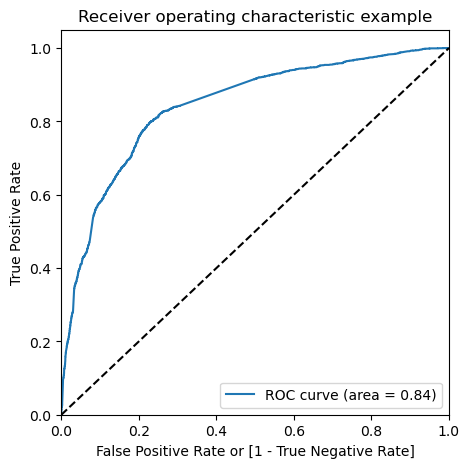

In [390]:
draw_roc(leads_data.Converted, leads_data.Predicted)

## Finding the optimal Cutoff point

In [391]:
l=[float(x)/10 for x in range(10)]
for i in l:
    leads_data[i]=leads_data.Predicted.map(lambda x: 1 if x>i else 0)
    
leads_data

,Lead Number,Converted,Predicted,Predicted_data,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
1,660728,0,0.317411,0,1,1,1,1,0,0,0,0,0,0
2,660727,1,0.582398,1,1,1,1,1,1,1,0,0,0,0
4,660681,1,0.600955,1,1,1,1,1,1,1,1,0,0,0
5,660680,0,0.239223,0,1,1,1,0,0,0,0,0,0,0
6,660673,1,0.675484,1,1,1,1,1,1,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9232,579642,0,0.998939,1,1,1,1,1,1,1,1,1,1,1
9235,579564,1,0.531361,1,1,1,1,1,1,1,0,0,0,0
9237,579545,0,0.285582,0,1,1,1,0,0,0,0,0,0,0
9238,579538,1,0.607237,1,1,1,1,1,1,1,1,0,0,0


In [392]:
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(leads_data.Converted, leads_data[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.410492  0.999165  0.039726
0.1   0.1  0.484423  0.979114  0.172849
0.2   0.2  0.632123  0.929407  0.444883
0.3   0.3  0.774657  0.819967  0.746119
0.4   0.4  0.783535  0.763576  0.796106
0.5   0.5  0.778047  0.637427  0.866614
0.6   0.6  0.744956  0.437343  0.938700
0.7   0.7  0.730105  0.360485  0.962904
0.8   0.8  0.686683  0.221805  0.979479
0.9   0.9  0.665214  0.149541  0.990003


<Axes: xlabel='prob'>

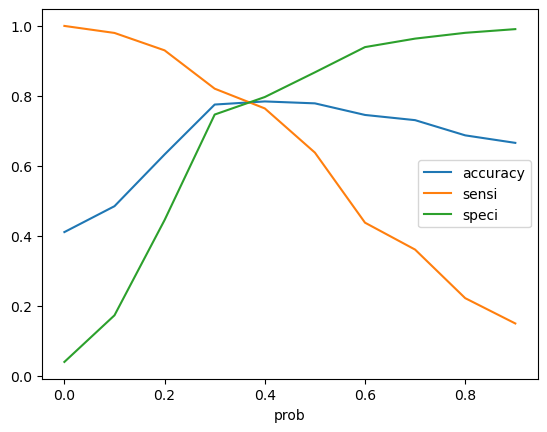

In [393]:
cutoff_df.plot(x='prob', y = ['accuracy','sensi','speci'])

In [394]:
# So the optimal cutoff value is 0.4 where all the lines intersect each other

In [395]:
cm2 = metrics.confusion_matrix(leads_data.Converted, leads_data[0.4])

In [396]:
cm2

array([[3026,  775],
       [ 566, 1828]], dtype=int64)

In [397]:
TN1 = cm2[0,0]
FP1 = cm2[0,1]
FN1 = cm2[1,0]
TP1 = cm2[1,1]

In [398]:
#accuracy
metrics.accuracy_score(leads_data.Converted, leads_data[0.4])

0.7835351089588378

In [399]:
#sensitivity
TP1/(TP1+FN1)

0.7635756056808688

In [400]:
# Specificity
TN1/ (TN1+FP1)

0.796106287818995

In [401]:
# Precision
metrics.precision_score(leads_data.Converted, leads_data[0.4])

0.7022666154437188

In [402]:
# Recall
metrics.recall_score(leads_data.Converted, leads_data[0.4])

0.7635756056808688

## Making predictions on test set


In [403]:
# scaling the columns in test dataset
x_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']]=scaler.fit_transform(x_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])

In [404]:
x_test.head()

,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
6772,0,0,1.921611,0.819069,1.083388,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2146,0,0,2.299335,-0.357905,0.510904,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6514,1,0,0.410717,-0.628390,1.083388,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
512,0,0,-0.344730,1.855318,-0.634066,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4643,0,0,1.166164,1.292417,0.510904,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [405]:
x_test = x_test[col]

In [406]:
x_test_sm = sm.add_constant(x_test)
y_test_pred = res.predict(x_test_sm)
y_test_pred

6772    0.407276
2146    0.144914
6514    0.319960
512     0.624482
4643    0.498054
          ...   
8990    0.879103
2015    0.544822
4293    0.242176
1238    0.242176
4619    0.575049
Length: 2656, dtype: float64

In [407]:
y_test_pred = pd.DataFrame(y_test_pred)

In [408]:
y_test_df = pd.DataFrame(y_test)

In [409]:
y_test_df['Lead ID'] = y_test_df.index 

In [410]:
y_test_df['Predicted'] = y_test_pred

In [411]:
y_test_df = y_test_df.reindex(['Lead ID','Converted', 'Predicted'], axis =1)

In [412]:
y_test_df.reset_index(inplace = True)

In [413]:
y_test_df.drop('index',axis =1, inplace = True)

In [414]:
y_test_df['Conversion_pred'] = y_test_df['Predicted'].map(lambda x: 1 if x>0.4 else 0)

In [415]:
y_test_df.head()

,Lead ID,Converted,Predicted,Conversion_pred
0,6772,1,0.407276,1
1,2146,0,0.144914,0
2,6514,0,0.319960,0
3,512,0,0.624482,1
4,4643,1,0.498054,1


In [416]:
y_test_cm = metrics.confusion_matrix(y_test_df.Converted, y_test_df.Conversion_pred)
y_test_cm

array([[1339,  325],
       [ 228,  764]], dtype=int64)

In [417]:
t_TN = y_test_cm[0,0] #True Negative
t_FP = y_test_cm[0,1] #False Positive
t_FN = y_test_cm[1,0] #False Negative
t_TP = y_test_cm[1,1] #True Positive

In [418]:
#Accuracy
(t_TN + t_TP)/sum(sum(y_test_cm))

0.7917921686746988

In [419]:
# Sensitivity
t_TP/(t_TP + t_FN)

0.7701612903225806

In [420]:
# Specificity
t_TN/(t_FP + t_TN)

0.8046875

In [421]:
# Precision
metrics.precision_score(y_test_df.Converted,y_test_df.Conversion_pred)

0.7015610651974288

In [422]:
# Recall
metrics.recall_score(y_test_df.Converted, y_test_df.Conversion_pred)

0.7701612903225806

# Lead scoring to all Leads

In [423]:
x_score = x

In [424]:
col

Index(['Do Not Email', 'Total Time Spent on Website',
       'Through Recommendations', 'Lead Source_Direct Traffic',
       'Lead Source_Google', 'Lead Source_Organic Search',
       'Lead Source_Reference', 'Lead Source_Referral Sites',
       'Last Notable Activity_Had a Phone Conversation',
       'Last Notable Activity_Olark Chat Conversation',
       'Last Notable Activity_SMS Sent', 'Last Notable Activity_Unreachable',
       'Last Notable Activity_Unsubscribed'],
      dtype='object')

In [425]:
# scaling the columns 
x_score[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.fit_transform(x_score[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])

In [426]:
x_score[col]

,Do Not Email,Total Time Spent on Website,Through Recommendations,Lead Source_Direct Traffic,Lead Source_Google,Lead Source_Organic Search,Lead Source_Reference,Lead Source_Referral Sites,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed
0,0,-0.880385,0,0,0,0,0,0,0,0,0,0,0
1,0,0.353989,0,0,0,1,0,0,0,0,0,0,0
2,0,1.925343,0,1,0,0,0,0,0,0,0,0,0
3,0,-0.321804,0,1,0,0,0,0,0,0,0,0,0
4,0,1.734876,0,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9235,1,2.498576,0,1,0,0,0,0,0,0,0,0,0
9236,0,-0.444508,0,1,0,0,0,0,0,0,1,0,0
9237,1,-0.515934,0,1,0,0,0,0,0,0,1,0,0
9238,0,0.033491,0,0,1,0,0,0,0,0,1,0,0


In [427]:
x_score_sm =sm.add_constant(x_score[col])

In [428]:
# Predicting probability value using 
y_pred= res.predict(x_score_sm)
y_pred

0       0.240114
1       0.318083
2       0.582793
3       0.151838
4       0.601384
          ...   
9235    0.531655
9236    0.461178
9237    0.286409
9238    0.607967
9239    0.493933
Length: 8851, dtype: float64

In [429]:
y_pred = pd.DataFrame(y_pred) 

In [430]:
leads_df.shape

(8851, 55)

In [431]:
y_pred['Lead Number'] = leads_df['Lead Number']

In [432]:
y_pred['Lead Score'] = round(y_pred[0]*100,0)

In [433]:
y_pred.columns=['Conversion Probability','Lead Number','Lead Score']

In [434]:
y_pred = y_pred.reindex(['Lead Number','Conversion Probability','Lead Score'], axis =1)

In [435]:
# Lead Score for each Lead in the dataset
y_pred

,Lead Number,Conversion Probability,Lead Score
0,660737,0.240114,24.0
1,660728,0.318083,32.0
2,660727,0.582793,58.0
3,660719,0.151838,15.0
4,660681,0.601384,60.0
...,...,...,...
9235,579564,0.531655,53.0
9236,579546,0.461178,46.0
9237,579545,0.286409,29.0
9238,579538,0.607967,61.0


In [436]:
y

0       0
1       0
2       1
3       0
4       1
       ..
9235    1
9236    0
9237    0
9238    1
9239    1
Name: Converted, Length: 8851, dtype: int64

In [437]:
y_pred['Converted'] = y

In [438]:
y_pred['Conversion Pred.'] =  y_pred['Lead Score'].map(lambda x: 1 if x> 40.0 else 0)

In [439]:
y_pred

,Lead Number,Conversion Probability,Lead Score,Converted,Conversion Pred.
0,660737,0.240114,24.0,0,0
1,660728,0.318083,32.0,0,0
2,660727,0.582793,58.0,1,1
3,660719,0.151838,15.0,0,0
4,660681,0.601384,60.0,1,1
...,...,...,...,...,...
9235,579564,0.531655,53.0,1,1
9236,579546,0.461178,46.0,0,1
9237,579545,0.286409,29.0,0,0
9238,579538,0.607967,61.0,1,1


In [440]:
# Confusion matrix
metrics.confusion_matrix(y_pred.Converted, y_pred['Conversion Pred.'])

array([[4387, 1078],
       [ 812, 2574]], dtype=int64)

In [441]:
# Recall value
metrics.recall_score(y_pred.Converted, y_pred['Conversion Pred.'])

0.7601890135853514

In [442]:
# Accuracy
metrics.accuracy_score(y_pred.Converted, y_pred['Conversion Pred.'])

0.7864648062365834

0.3853896103896104